In [21]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt


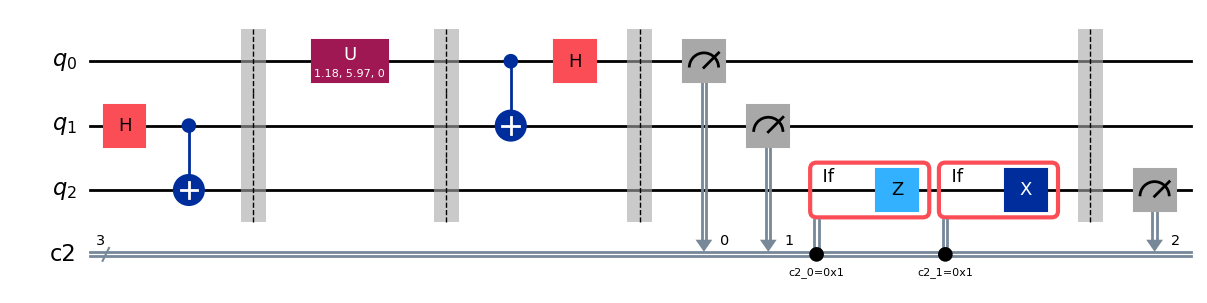

In [36]:
qr = QuantumRegister(3,'q')
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)
qc.h(1)
qc.cx(1,2)
qc.barrier()
np.random.seed(42)
theta = np.random.uniform(0.0, 1.0) * np.pi   
varphi = np.random.uniform(0.0, 2.0) * np.pi    
qc.u(theta,varphi,0,0)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
with qc.if_test((cr[0],1)):
    qc.z(2)
with qc.if_test((cr[1],1)):
    qc.x(2)
qc.barrier()
qc.measure(2,2)
qc.draw(output='mpl')


{'101': 80, '011': 203, '111': 76, '100': 67, '110': 61, '001': 180, '010': 178, '000': 179}


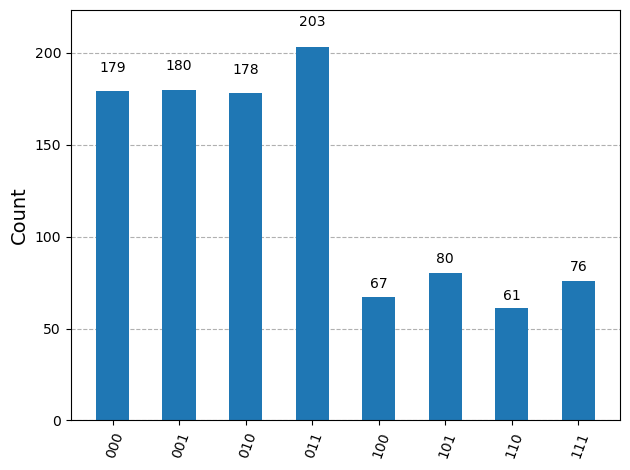

In [37]:
sim = AerSimulator()
job = sim.run(qc)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)


['101', '011', '111', '100', '110', '001', '010', '000']
[80, 203, 76, 67, 61, 180, 178, 179]


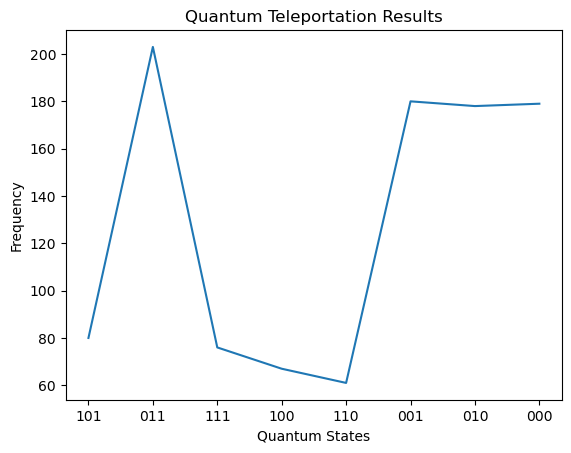

In [38]:
list_states = []
freq_states = []
for key in counts:
    list_states.append(key)
print(list_states)
for key in counts:
    freq_states.append(counts[key])
print(freq_states)
plt.plot(list_states,freq_states)
plt.xlabel('Quantum States')
plt.ylabel('Frequency')
plt.title('Quantum Teleportation Results')
plt.show()




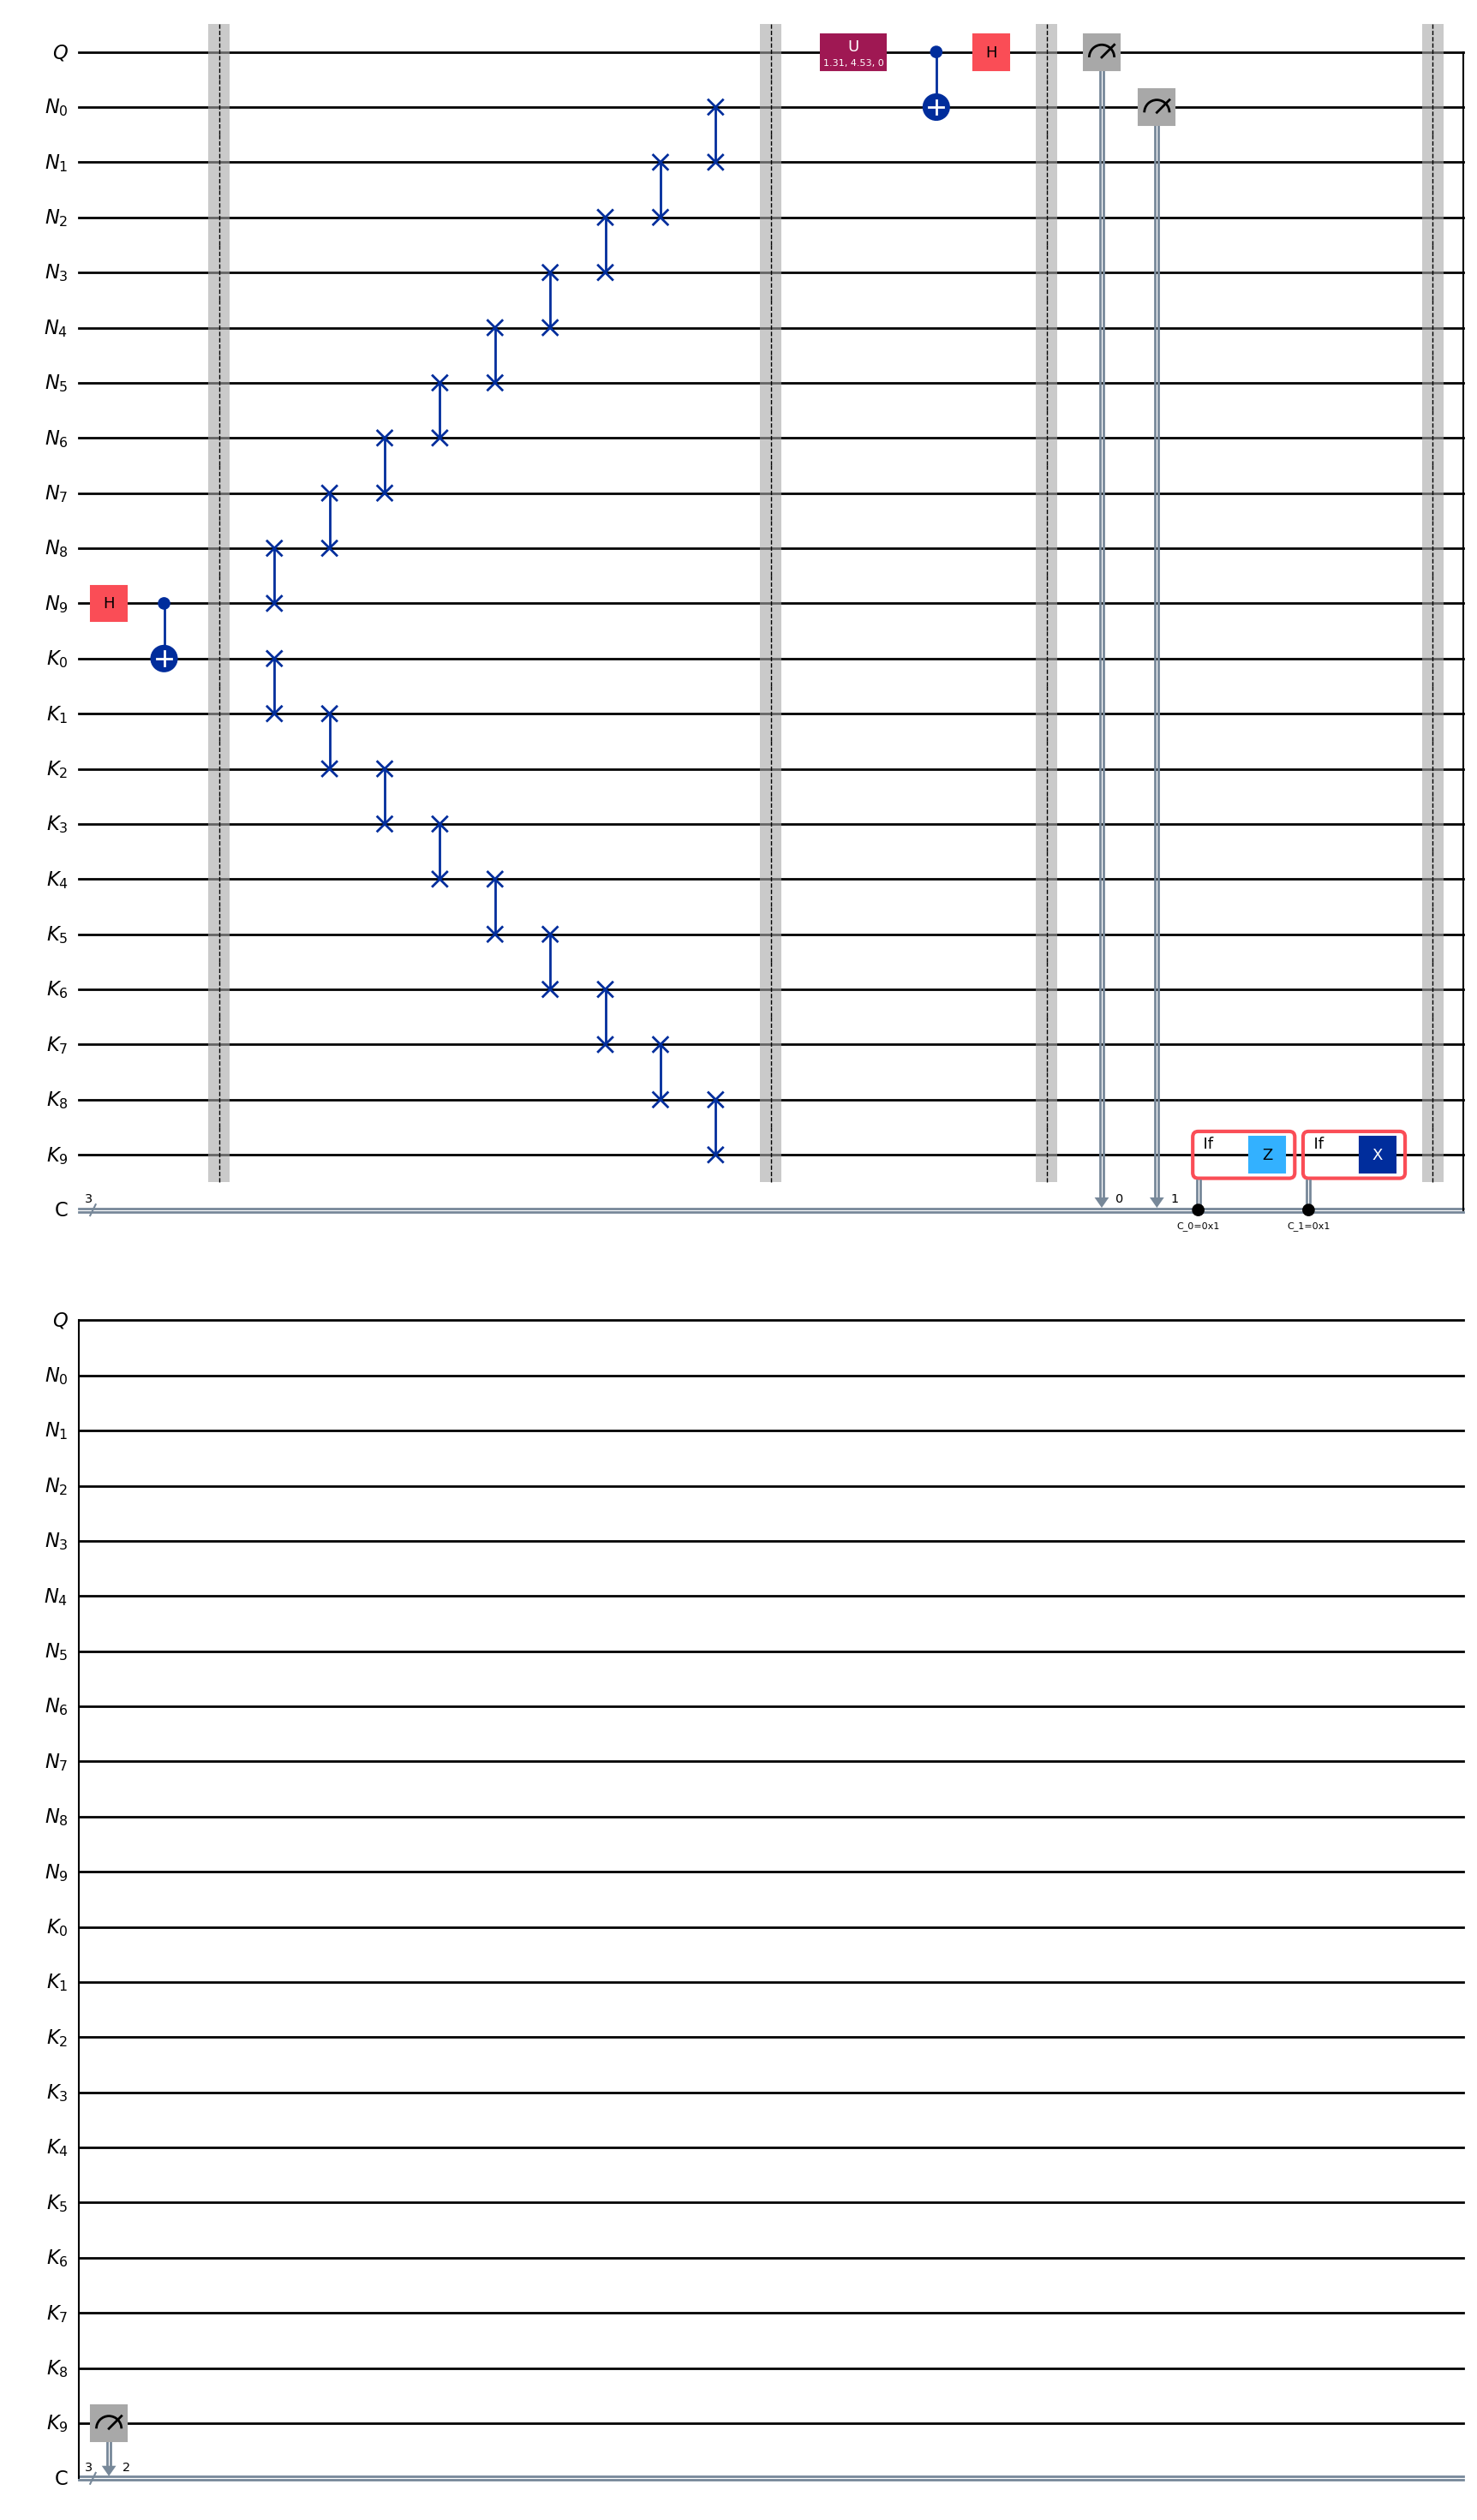

In [39]:
secret = QuantumRegister(1,'Q')
n_bits = QuantumRegister(10,'N')
k_bits = QuantumRegister(10,'K')
cr = ClassicalRegister(3,'C')
qc = QuantumCircuit(secret,n_bits,k_bits,cr)
qc.h(10)
qc.cx(10,11)
qc.barrier()
for i in range(9):
    qc.swap(10-i,9-i)
for i in range(10,19):
    qc.swap(i+1,i+2)
qc.barrier()
np.random.seed(1)
theta = np.random.uniform(0.0,1.0) * np.pi
phi = np.random.uniform(0.0,2.0) * np.pi
qc.u(theta,phi,0,0)
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
with qc.if_test((cr[0],1)):
    qc.z(20)
with qc.if_test((cr[1],1)):
    qc.x(20)
qc.barrier()
qc.measure(20,2)
qc.draw(output='mpl')

In [ ]:
sim2 = AerSimulator()
job2 = sim2.run(qc, shots = 1000000000)
result2 = job2.result()
counts2 = result.get_counts()
#print(counts)